In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alifia28","key":"91567b3c962f40f66a9c3c6dc890d06b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mcdonalds/nutrition-facts

  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 6.97MB/s]


In [ ]:
!ls

kaggle.json  nutrition-facts.zip  sample_data


In [ ]:
df = pd.read_csv('nutrition-facts.zip')

In [ ]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,30,10,200,8,57,19,1,5,51,10,10,0,30,4


In [ ]:
df.shape

(260, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**a) How many calories does the average McDonald's value meal contain?**

---

In [ ]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [ ]:
df['Calories'].mean()

368.2692307692308

In [ ]:
df.groupby(['Category'])['Calories'].mean()

Category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: Calories, dtype: float64

In [ ]:
mcd_meal = df.set_index('Category')
mcd_meal = mcd_meal.drop(['Beverages', 'Coffee & Tea', 'Smoothies & Shakes'],axis=0)

In [ ]:
mcd_meal.reset_index(inplace=True)

In [ ]:
mcd_meal_avgcal = mcd_meal.groupby(['Category'])['Calories'].mean()
mcd_meal_avgcal

Category
Beef & Pork       494.000000
Breakfast         526.666667
Chicken & Fish    552.962963
Desserts          222.142857
Salads            270.000000
Snacks & Sides    245.769231
Name: Calories, dtype: float64

In [ ]:
mcd_meal['Calories'].mean()

462.09090909090907

Text(0.5, 1.0, "Average Calories on McDonald's Meal")

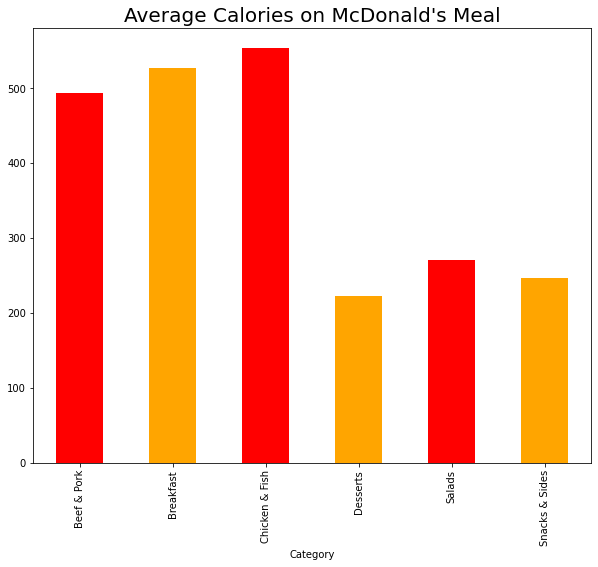

In [ ]:
a = mcd_meal_avgcal.plot.bar(stacked=False, figsize= (10,8), color=['red','orange'])
a.set_title("Average Calories on McDonald's Meal", size=20)

**b) How much do beverages, like soda or coffee, contribute to the overall caloric intake?**

---



In [ ]:
df['% Overall Daily Calories Intake'] = df['Calories']/2000*100
minuman = df.loc[df['Category'].isin(['Beverages','Coffee & Tea','Smoothies & Shakes'])]
minuman.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),% Overall Daily Calories Intake
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0,7.0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0,10.0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0,14.0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,0,0,0,0,28,9,0,0,28,0,0,0,0,0,5.0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
cols = list(minuman.columns.values)
print(cols)

['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)', '% Overall Daily Calories Intake']


In [ ]:
minuman = minuman[['Category', 'Item', 'Calories', '% Overall Daily Calories Intake', 'Serving Size', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']]

In [ ]:
beve = minuman.groupby('Category')['Calories','% Overall Daily Calories Intake'].mean()
bev = pd.DataFrame(beve)
bev

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Calories,% Overall Daily Calories Intake
Category,,
Beverages,113.703704,5.685185
Coffee & Tea,283.894737,14.194737
Smoothies & Shakes,531.428571,26.571429


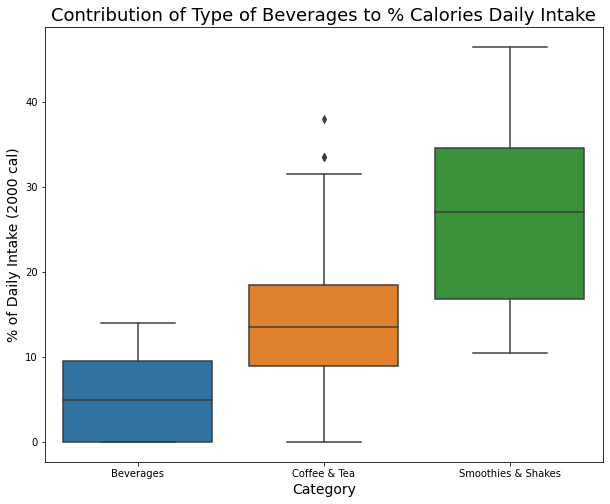

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(x="Category", 
            y="% Overall Daily Calories Intake", 
            data=minuman)
plt.ylabel("% of Daily Intake (2000 cal)", size=14)
plt.xlabel("Category", size=14)
plt.title("Contribution of Type of Beverages to % Calories Daily Intake", size=18)
plt.savefig("Graph B.png")

**c) Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?**

---



In [ ]:
df_chicken = df[df['Item'].str.contains('Chicken', regex=False)]

In [ ]:
df_chicken.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),% Overall Daily Calories Intake
16,Breakfast,Southern Style Chicken Biscuit (Regular Biscuit),5 oz (143 g),410,180,20.0,31,8.0,41,0.0,30,10,1180,49,41,14,2,6,3,17,0,2,6,15,20.5
17,Breakfast,Southern Style Chicken Biscuit (Large Biscuit),5.5 oz (157 g),470,220,24.0,37,9.0,45,0.0,30,10,1290,54,46,15,3,11,4,17,4,2,8,15,23.5
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20,25.5
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20,17.5
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20,33.5


In [ ]:
df_chicken_nut = df_chicken.drop(['Category', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)','% Overall Daily Calories Intake'], axis=1)

In [ ]:
df_chicken_nut.shape

(40, 13)

In [ ]:
df_grilledchicken_nut = df_chicken_nut[df_chicken_nut['Item'].str.contains('Grilled', regex=False)]

In [ ]:
df_grilledchicken_nut.shape

(13, 13)

In [ ]:
df_crispychicken_nut = df_chicken_nut[df_chicken_nut['Item'].str.contains('Crispy', regex=False)]

In [ ]:
df_crispychicken_nut.shape

(14, 13)

In [ ]:
df_grilledchicken_nut.head()

,Item,Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
58,Premium Grilled Chicken Classic Sandwich,820,34,42,14,3,13,8,28,4,8,15,20
60,Premium Grilled Chicken Club Sandwich,1250,52,44,15,3,13,9,40,8,20,30,20
62,Premium Grilled Chicken Ranch BLT Sandwich,1230,51,43,14,3,13,9,36,4,20,15,20
64,Bacon Clubhouse Grilled Chicken Sandwich,1560,65,51,17,4,15,14,40,8,30,30,15
71,Premium McWrap Chicken & Bacon (Grilled Chicken),1370,57,42,14,3,13,6,36,60,25,20,20


In [ ]:
df_crispychicken_nut.head()

,Item,Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Premium Crispy Chicken Classic Sandwich,990,41,55,18,3,13,10,24,4,6,15,20
59,Premium Crispy Chicken Club Sandwich,1410,59,58,19,3,14,11,36,8,20,30,20
61,Premium Crispy Chicken Ranch BLT Sandwich,1400,58,57,19,3,13,11,32,4,20,15,20
63,Bacon Clubhouse Crispy Chicken Sandwich,1720,72,65,22,4,15,16,36,8,25,30,15
65,Southern Style Crispy Chicken Sandwich,910,38,43,14,2,7,7,21,4,2,15,15


In [ ]:
grilledchicken = df_grilledchicken_nut.mean()

In [ ]:
grilledchicken.round()

Sodium                           1019.0
Sodium (% Daily Value)             42.0
Carbohydrates                      37.0
Carbohydrates (% Daily Value)      12.0
Dietary Fiber                       3.0
Dietary Fiber (% Daily Value)      13.0
Sugars                              8.0
Protein                            29.0
Vitamin A (% Daily Value)          43.0
Vitamin C (% Daily Value)          16.0
Calcium (% Daily Value)            16.0
Iron (% Daily Value)               16.0
dtype: float64

In [ ]:
crispychicken = df_crispychicken_nut.mean()

In [ ]:
crispychicken.round()

Sodium                           1149.0
Sodium (% Daily Value)             48.0
Carbohydrates                      49.0
Carbohydrates (% Daily Value)      16.0
Dietary Fiber                       3.0
Dietary Fiber (% Daily Value)      12.0
Sugars                              9.0
Protein                            25.0
Vitamin A (% Daily Value)          39.0
Vitamin C (% Daily Value)          14.0
Calcium (% Daily Value)            17.0
Iron (% Daily Value)               16.0
dtype: float64

In [ ]:
df_allchick = pd.DataFrame({'Crispy Chicken': crispychicken.round(),
                   'Grilled Chicken': grilledchicken.round()})

In [ ]:
df_allchick

,Crispy Chicken,Grilled Chicken
Sodium,1149.0,1019.0
Sodium (% Daily Value),48.0,42.0
Carbohydrates,49.0,37.0
Carbohydrates (% Daily Value),16.0,12.0
Dietary Fiber,3.0,3.0
Dietary Fiber (% Daily Value),12.0,13.0
Sugars,9.0,8.0
Protein,25.0,29.0
Vitamin A (% Daily Value),39.0,43.0
Vitamin C (% Daily Value),14.0,16.0


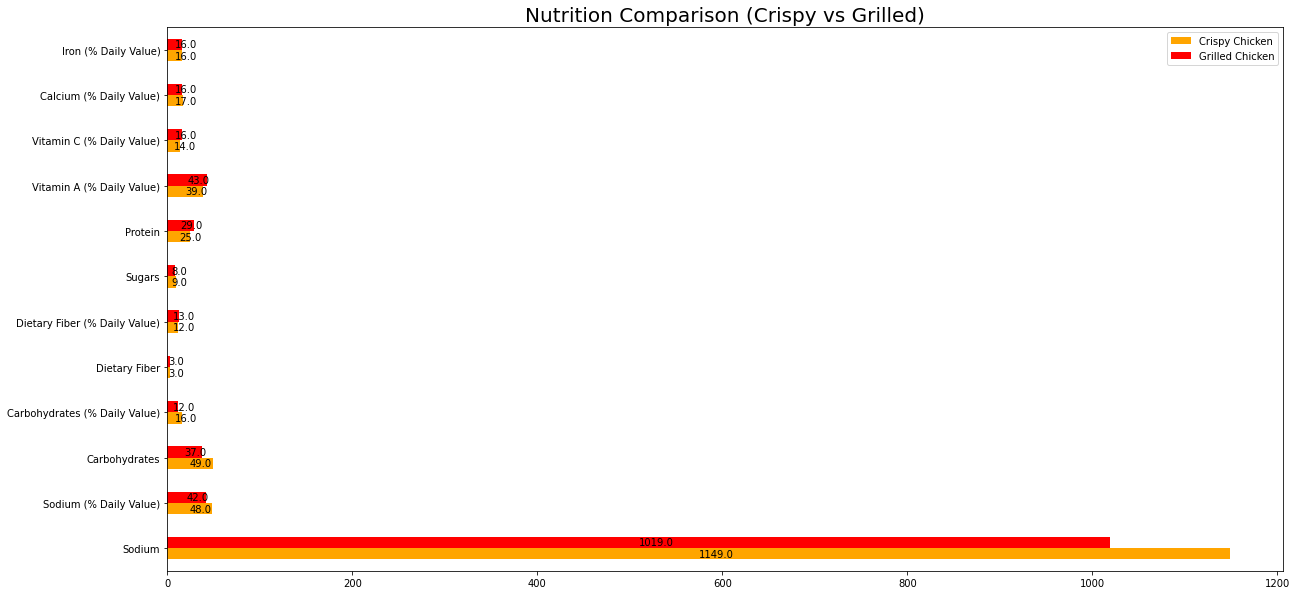

In [ ]:
ax = df_allchick.plot.barh(stacked=False, figsize= (20,10), color=['orange', 'red'])
ax.set_title("Nutrition Comparison (Crispy vs Grilled)", size=20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

**d) What about ordering egg whites instead of whole eggs?**

---



In [ ]:
df_wholeegg = df[df['Item'].str.contains('Egg', regex=False)]

In [ ]:
df_wholeegg.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)',
       '% Overall Daily Calories Intake'],
      dtype='object')

In [ ]:
df_wholeegg_nut = df_wholeegg.drop(['Category', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)','% Overall Daily Calories Intake'], axis=1)

In [ ]:
df_wholeegg_nut.shape

(25, 13)

In [ ]:
df_eggwhites_nut = df_wholeegg_nut[df_wholeegg_nut['Item'].str.contains('Whites', regex=False)]

In [ ]:
df_eggwhites_nut.shape

(12, 13)

In [ ]:
df_egg_nut = df_wholeegg_nut[~df_wholeegg_nut['Item'].str.contains('Whites',regex=False)]

In [ ]:
df_egg_nut.shape

(13, 13)

In [ ]:
df_egg_nut

,Item,Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Egg McMuffin,750,31,31,10,4,17,3,17,10,0,25,15
1,Egg White Delight,770,32,30,10,4,17,3,18,6,0,25,8
3,Sausage McMuffin with Egg,860,36,30,10,4,17,2,21,15,0,30,15
5,Steak & Egg McMuffin,960,40,31,10,4,18,3,26,15,2,30,20
6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",1300,54,38,13,2,7,3,19,10,8,15,15
7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",1410,59,43,14,3,12,4,19,15,8,20,20
12,Sausage Biscuit with Egg (Regular Biscuit),1170,49,36,12,2,6,2,18,6,0,10,20
13,Sausage Biscuit with Egg (Large Biscuit),1280,53,42,14,3,11,3,18,10,0,10,20
18,Steak & Egg Biscuit (Regular Biscuit),1470,61,38,13,2,8,3,25,10,2,20,25
19,"Bacon, Egg & Cheese McGriddles",1250,52,48,16,2,9,15,19,10,10,20,15


In [ ]:
df_eggwhites_nut

,Item,Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
4,Sausage McMuffin with Egg Whites,880,37,30,10,4,17,2,21,6,0,25,10
8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",1300,54,36,12,2,7,3,20,2,8,15,10
9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",1420,59,42,14,3,12,4,20,6,8,15,15
14,Sausage Biscuit with Egg Whites (Regular Biscuit),1180,49,34,11,2,6,3,18,0,0,8,15
15,Sausage Biscuit with Egg Whites (Large Biscuit),1290,54,40,13,3,11,3,18,4,0,8,15
20,"Bacon, Egg & Cheese McGriddles with Egg Whites",1250,52,47,16,2,9,16,20,2,10,15,10
23,"Sausage, Egg & Cheese McGriddles with Egg Whites",1320,55,46,15,2,9,15,21,2,0,20,10
25,"Bacon, Egg & Cheese Bagel with Egg Whites",1480,62,55,18,3,12,8,30,10,15,20,15
29,Big Breakfast with Egg Whites (Regular Biscuit),1590,66,50,17,3,12,3,26,0,2,10,15
30,Big Breakfast with Egg Whites (Large Biscuit),1700,71,55,18,4,17,4,26,4,2,10,15


In [ ]:
wholeeggs = df_egg_nut.mean()

In [ ]:
wholeeggs.round()

Sodium                           1195.0
Sodium (% Daily Value)             50.0
Carbohydrates                      41.0
Carbohydrates (% Daily Value)      14.0
Dietary Fiber                       3.0
Dietary Fiber (% Daily Value)      12.0
Sugars                              5.0
Protein                            22.0
Vitamin A (% Daily Value)          12.0
Vitamin C (% Daily Value)           4.0
Calcium (% Daily Value)            21.0
Iron (% Daily Value)               18.0
dtype: float64

In [ ]:
whiteeggs = df_eggwhites_nut.mean()

In [ ]:
whiteeggs.round()

Sodium                           1489.0
Sodium (% Daily Value)             62.0
Carbohydrates                      55.0
Carbohydrates (% Daily Value)      18.0
Dietary Fiber                       3.0
Dietary Fiber (% Daily Value)      14.0
Sugars                              8.0
Protein                            24.0
Vitamin A (% Daily Value)           3.0
Vitamin C (% Daily Value)           4.0
Calcium (% Daily Value)            16.0
Iron (% Daily Value)               16.0
dtype: float64

In [ ]:
df_all = pd.DataFrame({'Whole Eggs': wholeeggs.round(),
                   'White Eggs': whiteeggs.round()})

In [ ]:
df_all

,Whole Eggs,White Eggs
Sodium,1195.0,1489.0
Sodium (% Daily Value),50.0,62.0
Carbohydrates,41.0,55.0
Carbohydrates (% Daily Value),14.0,18.0
Dietary Fiber,3.0,3.0
Dietary Fiber (% Daily Value),12.0,14.0
Sugars,5.0,8.0
Protein,22.0,24.0
Vitamin A (% Daily Value),12.0,3.0
Vitamin C (% Daily Value),4.0,4.0


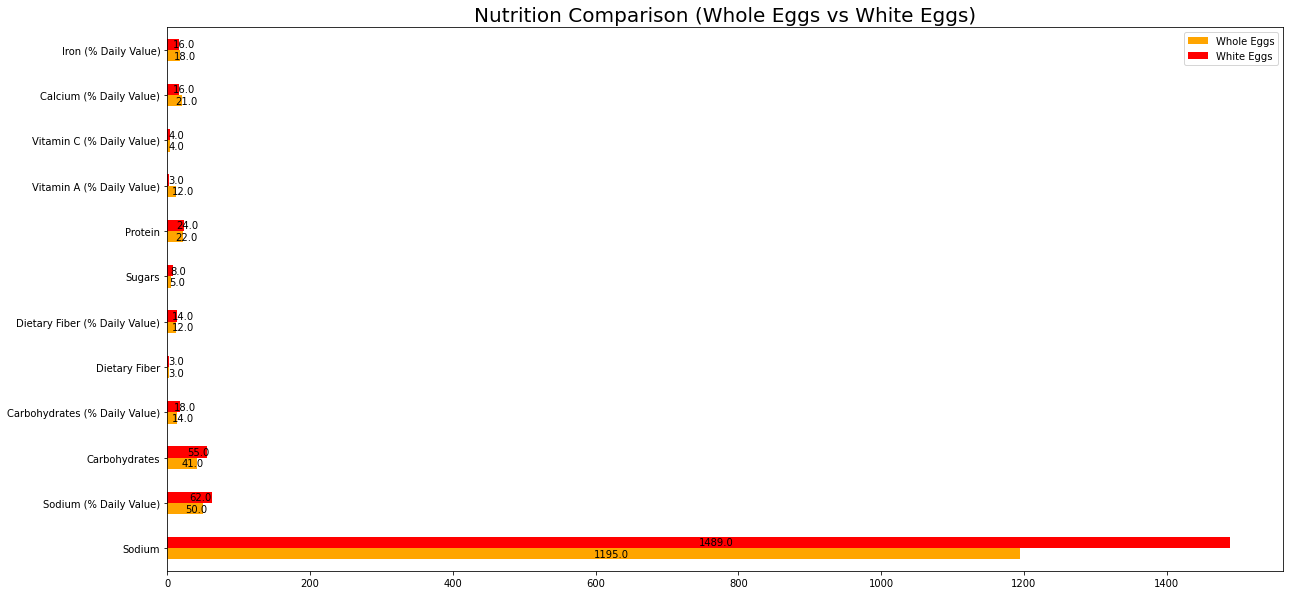

In [ ]:
ax = df_all.plot.barh(stacked=False, figsize= (20,10), color=['orange', 'red'])
ax.set_title("Nutrition Comparison (Whole Eggs vs White Eggs)", size=20)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

**e) What is the least number of items could you order from the menu to meet one day's nutritional requirements?**

---



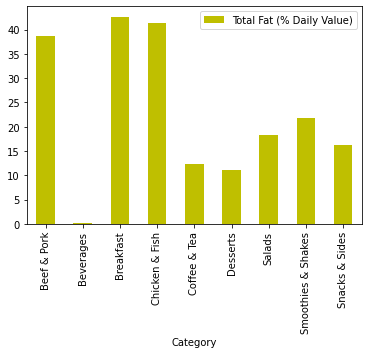

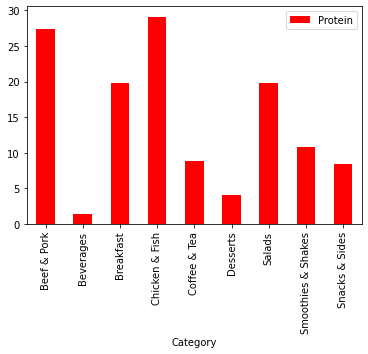

In [ ]:
persen_fat = df.pivot_table('Total Fat (% Daily Value)','Category').plot(kind='bar', stacked='True', color='y')
proteins = df.pivot_table('Protein','Category').plot(kind='bar', stacked='True', color='r')

# Dari barplot di bawah, dapat diketahui bahwa makanan tinggi lemak dan tinggi protein
# dapat diperoleh dari item yang ada pada kategori Chicken & Fish atau Beef & Pork

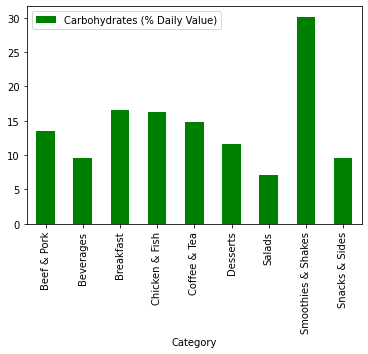

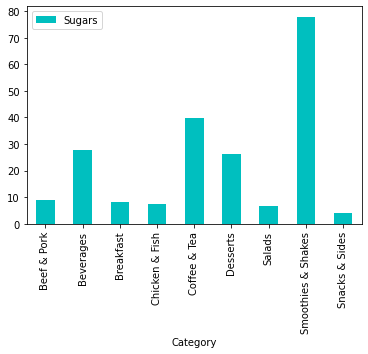

In [ ]:
persen_karbo = df.pivot_table('Carbohydrates (% Daily Value)','Category').plot(kind='bar', stacked='True', color='g')
sugar = df.pivot_table('Sugars','Category').plot(kind='bar', stacked='True', color='c')

# Dari dua barplot di bawah diketahui bahwa Smoothies & Shakes memiliki kandungan Karbohidrat yang tinggi,
# tetapi tidak disarankan untuk dikonsumsi karena kandungan gulanya juga tinggi. Oleh karena itu,
# apabila menginginkan item dengan karbo tinggi tetapi gula rendah, dapat mencoba menu dari kategori
# Breakfast atau Chicken & Fish

In [ ]:
MenuItems = df.Item.tolist()
Calories = df.set_index('Item')['Calories'].to_dict()
TotalFat = df.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = df.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = df.set_index('Item')['Carbohydrates'].to_dict()
Sugars = df.set_index('Item')['Sugars'].to_dict()
Protein = df.set_index('Item')['Protein'].to_dict()
Sodium = df.set_index('Item')['Sodium'].to_dict()

# Energy: 2,000kcal
# Total fat: less than 70g
# Saturates: less than 20g
# Carbohydrate: at least 260g
# Total sugars: 90g
# Protein: 50g
# Salt: less than 6g

In [ ]:
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff

In [ ]:
pip install pulp

     |████████████████████████████████| 40.6MB 92kB/s 


In [ ]:
from pulp import *

In [ ]:
prob = LpProblem("McOptimization Problem", LpMinimize)
MenuItems_vars = LpVariable.dicts("MenuItems",MenuItems,lowBound=0, upBound=10,cat='Integer')
prob += lpSum([Calories[i]*MenuItems_vars[i] for i in MenuItems]), "Calories"
prob += lpSum([TotalFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 70, "TotalFat"
prob += lpSum([SaturatedFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 20, "Saturated Fat"
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) >= 260, "Carbohydrates_lower"
# prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) <= 360, "Carbohydrates_upper"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) >= 80, "Sugars_lower"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) <= 100, "Sugars_upper"

prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) >= 45, "Protein_lower"
prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) <= 55, "Protein_upper"

prob += lpSum([Sodium[i]*MenuItems_vars[i] for i in MenuItems]) <= 6000, "Sodium"

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1195: UserWarning:

Spaces are not permitted in the name. Converted to '_'



In [ ]:
prob.writeLP("McOptimization.lp")
prob.solve()
data_matrix = []
data_matrix.append(['Item', 'Amount','Calories','Total Fat','Carbohydrates','Protein','Sodium'])

In [ ]:
for v in prob.variables():
    if v.varValue > 0:
        Item = df.loc[df['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue


        data_matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0], \
                           Item_TotalFat[0],Item_Carbohydrates[0],Item_Protein[0],Item_Sodium[0]])

In [ ]:
sums = 0
results = {}
print("Total Calories = ", value(prob.objective))
for constraint in prob.constraints:
    s = 0
    for var, coefficient in prob.constraints[constraint].items():
        sums += var.varValue * coefficient
    results[prob.constraints[constraint].name.replace('_lower','').replace('_upper','')] = s  

Total Calories =  1370.0


In [ ]:
data_matrix
coba = pd.DataFrame(data_matrix)
tabel = coba.drop_duplicates()
hasil = tabel.rename(columns={0:'Item',1:'Amount',2:'Calories',3:'Total Fat',4:'Carbohydrates',5:'Protein',6:'Sodium'})
data_item = hasil.drop(index=0)
data_item

,Item,Amount,Calories,Total Fat,Carbohydrates,Protein,Sodium
1,Apple Slices,2,30,0,8,0,0
2,Diet Dr Pepper (Large),7,0,0,0,28,980
3,Fruit & Maple Oatmeal without Brown Sugar,5,1300,20,245,25,575
4,Side Salad,2,40,0,8,2,20
